In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data from google sheet
sheet_id = "1C9DrBoRznWsSAkVSTvSCLTSA9B72YOCGu9F-7eMmA9k"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df=pd.read_csv(url)

C:\Users\didar\AppData\Local\Temp\ipykernel_23056\4252266651.py:5: DtypeWarning: Columns (32,35,36,37,38,39,40,41,47,48,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(url)


In [3]:
df  = df.iloc[: , :54]
df.head()

,MSA/MD,Demographic State Code,County Code,Tract Code,Tract Income\n Level,Distressed or \nUnderserved Tract,Tract Median \nFamily Income %,2021 FFIEC Est. \nMSA/MD non-\nMSA/MD Median \nFamily Income,2021 Est. Tract \nMedian Family\n Income,2015 Tract Median \nFamily Income,...,County Code.2,Tract Code.2,Total \nHousing \nUnits,1- to 4- \nFamily Units,Median \nHouse Age \n(Years),Inside \nPrincipal\n City?,Owner \nOccupied\n Units,Vacant Units,Owner \nOccupied \n1- to 4- Family\n Units,Renter \nOccupied\n Units
0,"ABILENE, TX",48,59,A 0301.01,Middle,No,102.80,"$63,400","$65,175","$58,029",...,59,A 0301.01,2046,2036,39,No,1432,264,1432,350
1,"ABILENE, TX",48,59,A 0301.02,Middle,No,107.75,"$63,400","$68,314","$60,828",...,59,A 0301.02,2180,2180,31,No,1507,440,1507,233
2,"ABILENE, TX",48,59,A 0302.00,Middle,No,91.49,"$63,400","$58,005","$51,649",...,59,A 0302.00,2348,2345,45,No,1374,597,1374,377
3,"ABILENE, TX",48,59,A 9999.99,Middle,No,99.05,"$63,400","$62,798","$55,912",...,59,A 9999.99,6574,6561,38,No,4313,1301,4313,960
4,"ABILENE, TX",48,253,A 0201.01,Upper,No,120.84,"$63,400","$76,613","$68,214",...,253,A 0201.01,749,749,38,Yes,490,167,490,92


In [4]:
# removing $ sign
colstocheck = df.columns
df[colstocheck] = df[colstocheck].replace({'\$':''}, regex = True)
# removing comma
df.replace(',','', regex=True, inplace=True)

In [5]:
df.head()

,MSA/MD,Demographic State Code,County Code,Tract Code,Tract Income\n Level,Distressed or \nUnderserved Tract,Tract Median \nFamily Income %,2021 FFIEC Est. \nMSA/MD non-\nMSA/MD Median \nFamily Income,2021 Est. Tract \nMedian Family\n Income,2015 Tract Median \nFamily Income,...,County Code.2,Tract Code.2,Total \nHousing \nUnits,1- to 4- \nFamily Units,Median \nHouse Age \n(Years),Inside \nPrincipal\n City?,Owner \nOccupied\n Units,Vacant Units,Owner \nOccupied \n1- to 4- Family\n Units,Renter \nOccupied\n Units
0,ABILENE TX,48,59,A 0301.01,Middle,No,102.80,63400,65175,58029,...,59,A 0301.01,2046,2036,39,No,1432,264,1432,350
1,ABILENE TX,48,59,A 0301.02,Middle,No,107.75,63400,68314,60828,...,59,A 0301.02,2180,2180,31,No,1507,440,1507,233
2,ABILENE TX,48,59,A 0302.00,Middle,No,91.49,63400,58005,51649,...,59,A 0302.00,2348,2345,45,No,1374,597,1374,377
3,ABILENE TX,48,59,A 9999.99,Middle,No,99.05,63400,62798,55912,...,59,A 9999.99,6574,6561,38,No,4313,1301,4313,960
4,ABILENE TX,48,253,A 0201.01,Upper,No,120.84,63400,76613,68214,...,253,A 0201.01,749,749,38,Yes,490,167,490,92


C:\Users\didar\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


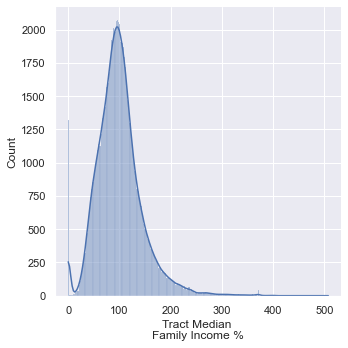

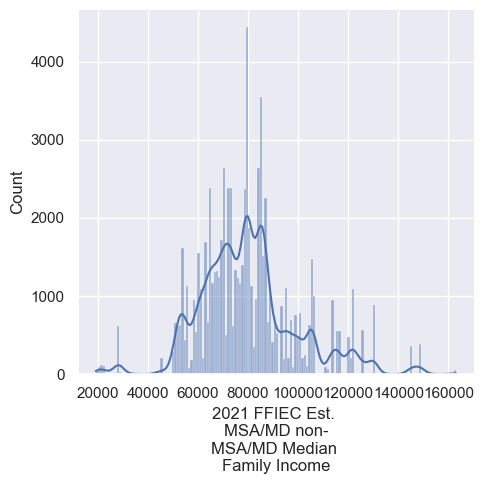

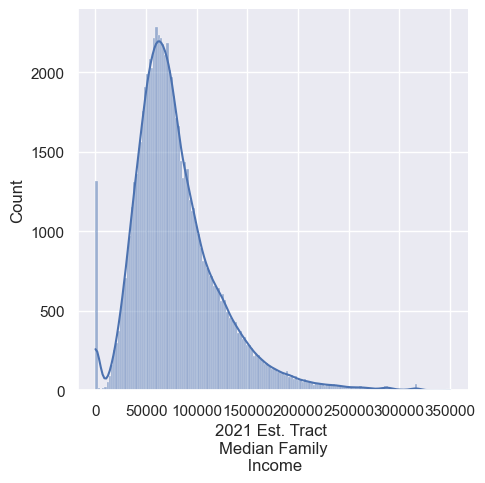

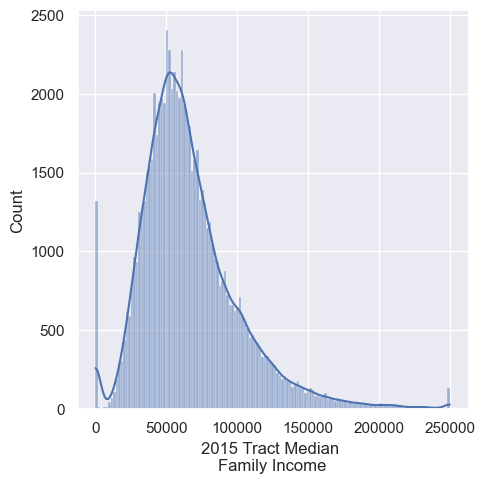

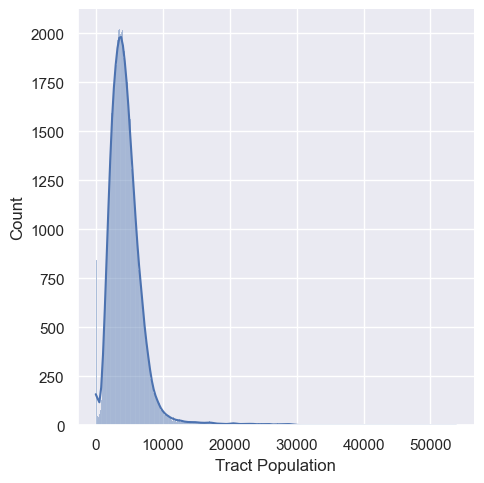

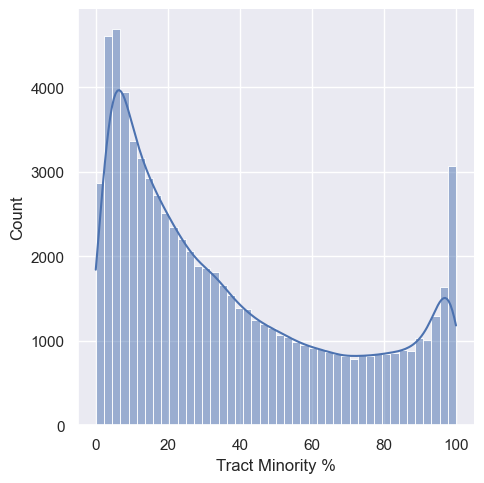

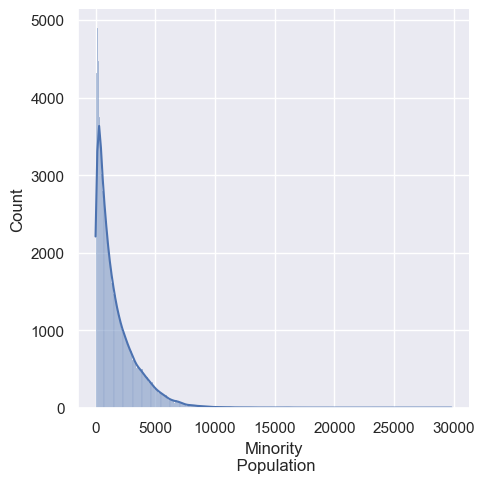

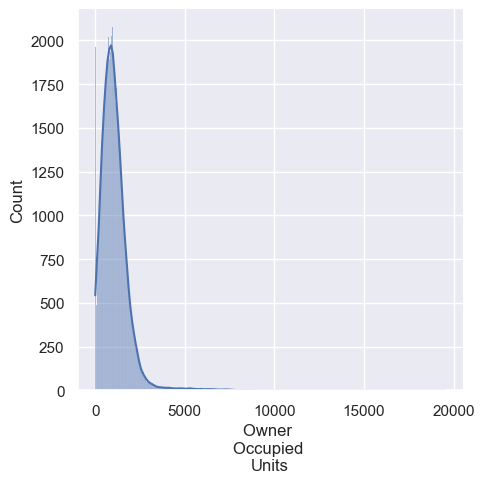

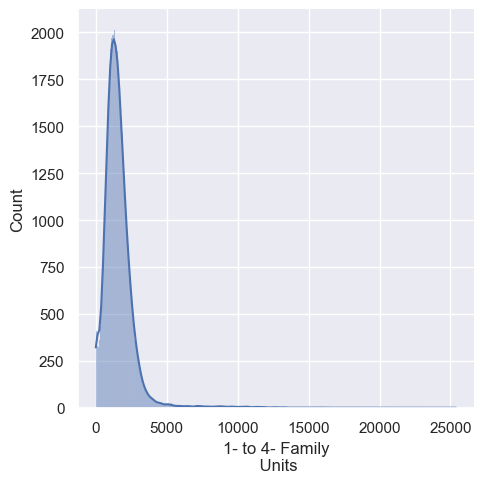

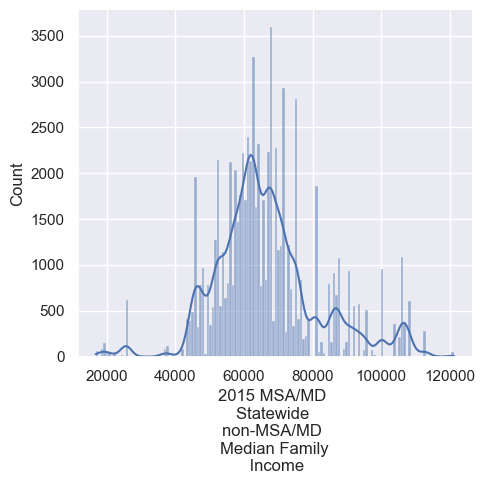

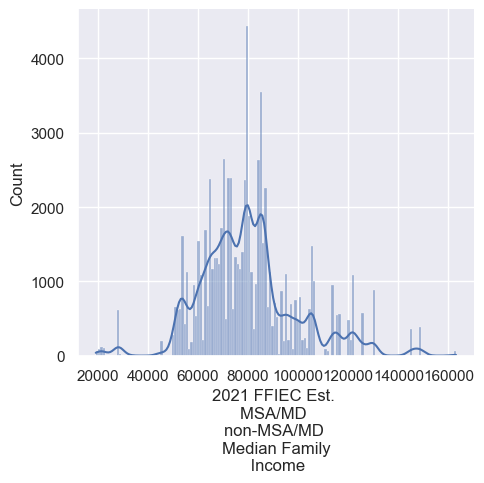

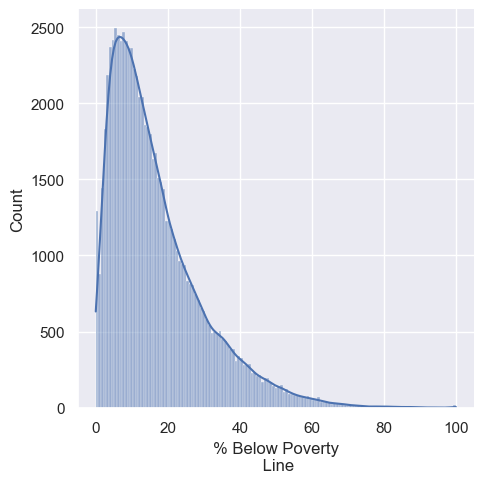

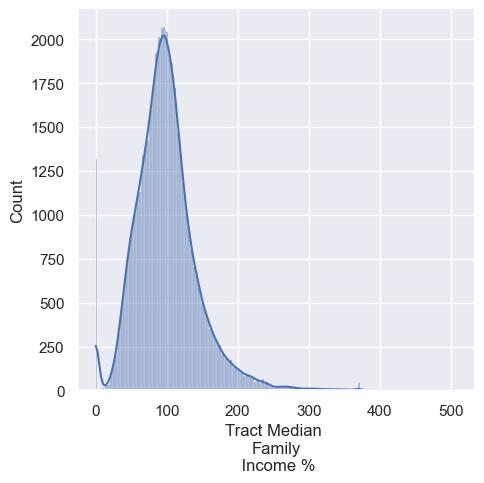

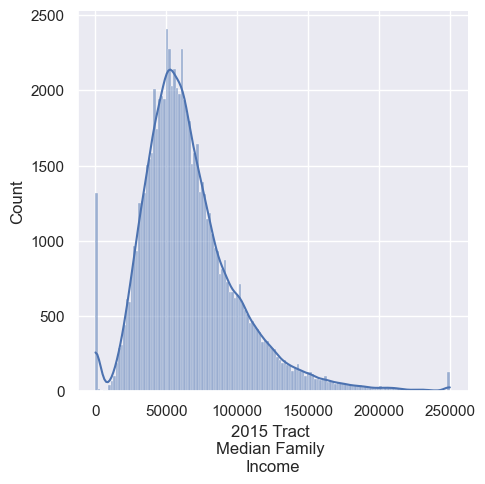

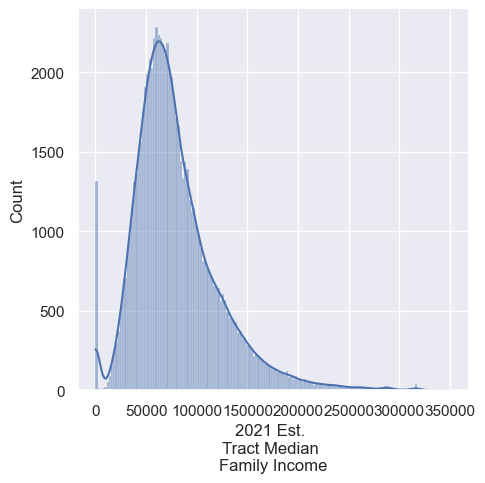

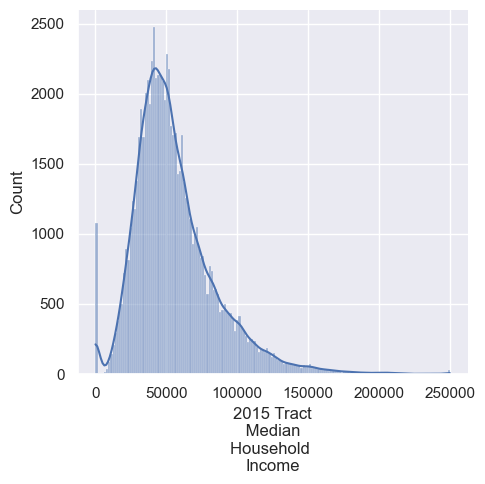

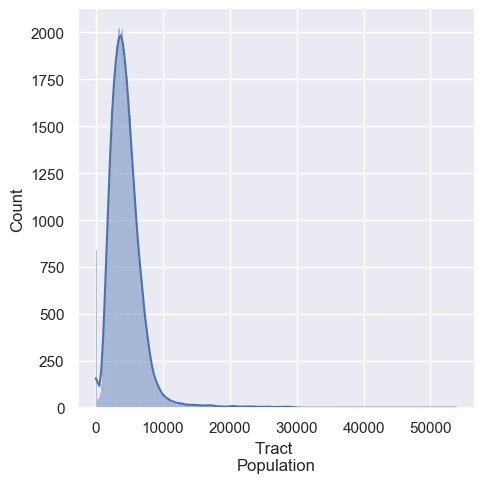

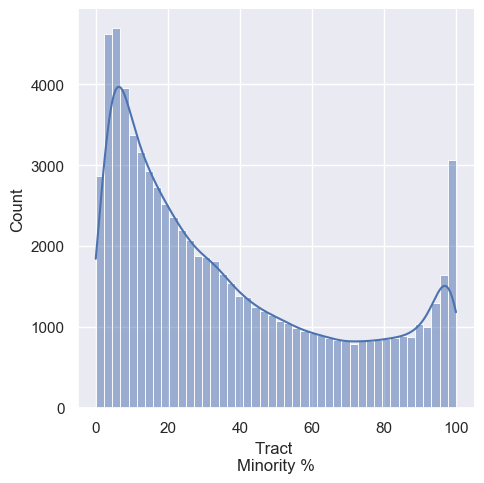

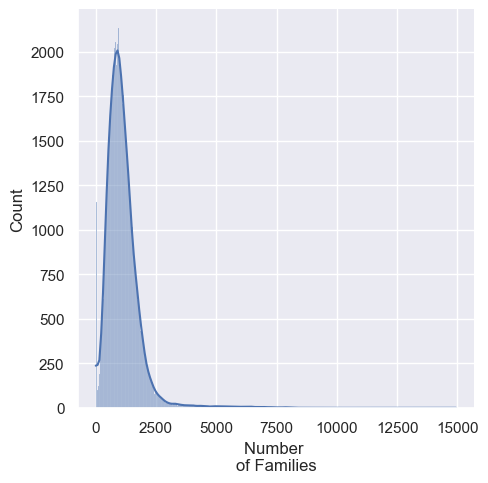

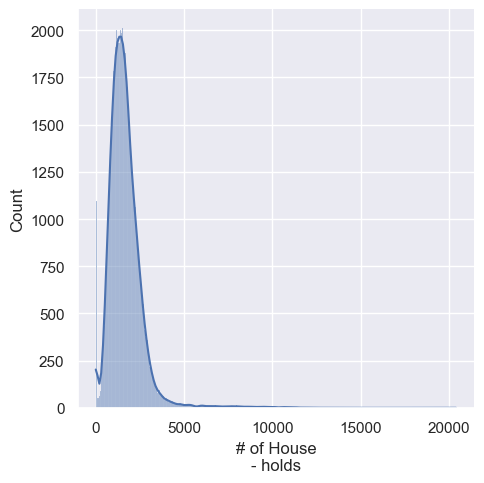

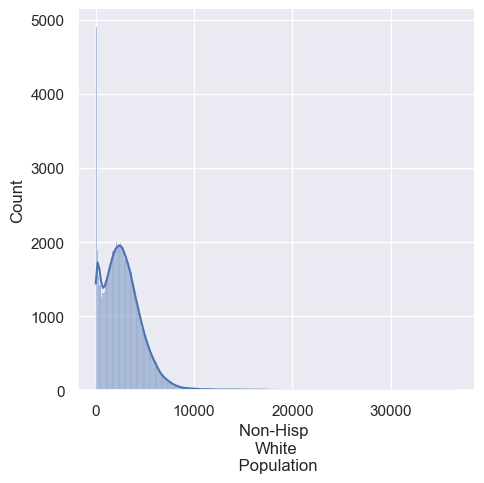

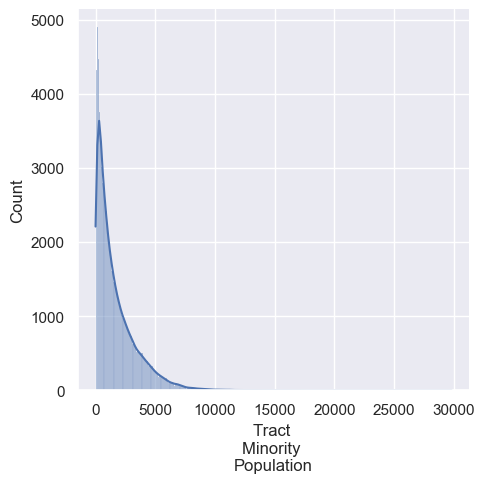

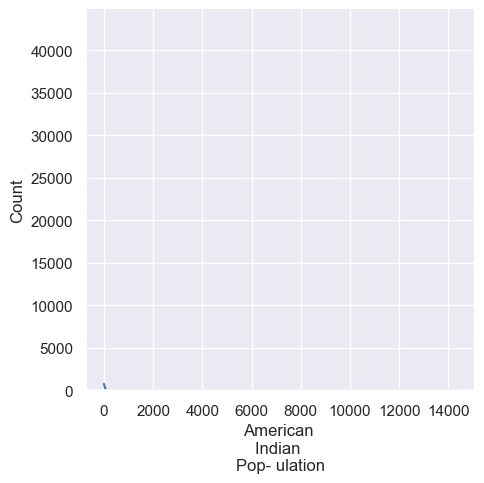

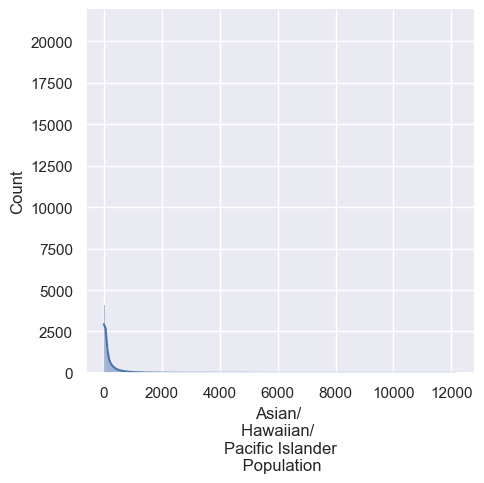

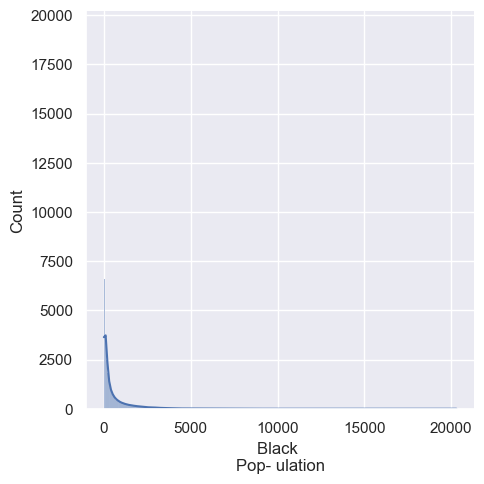

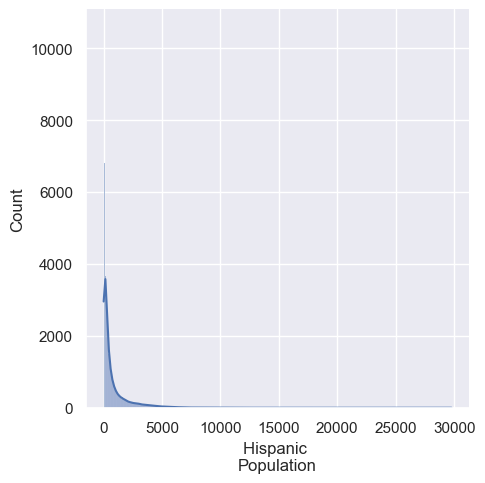

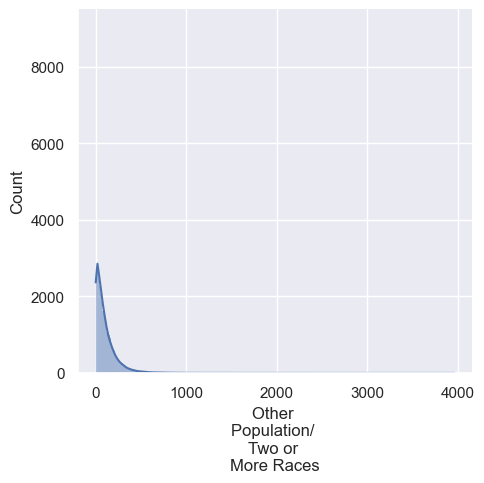

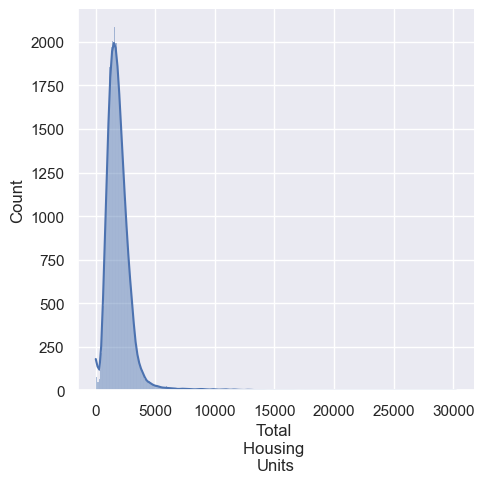

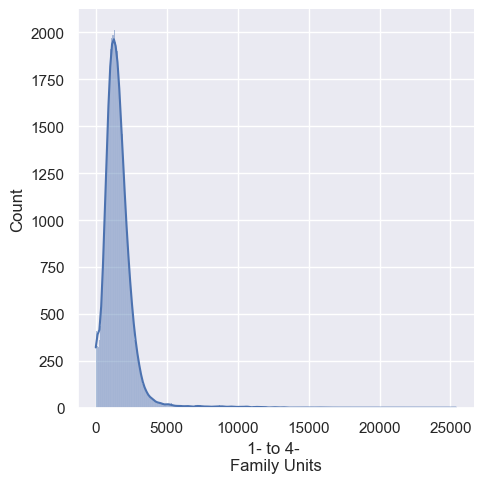

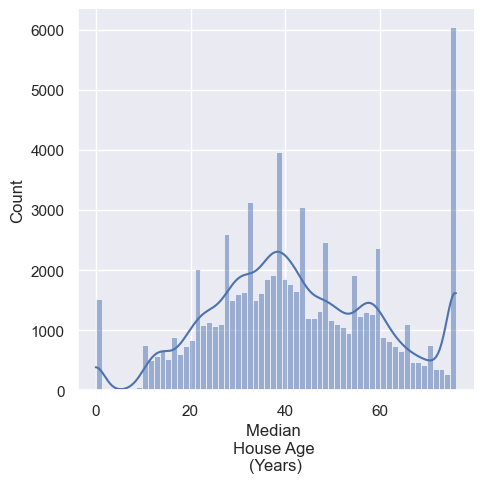

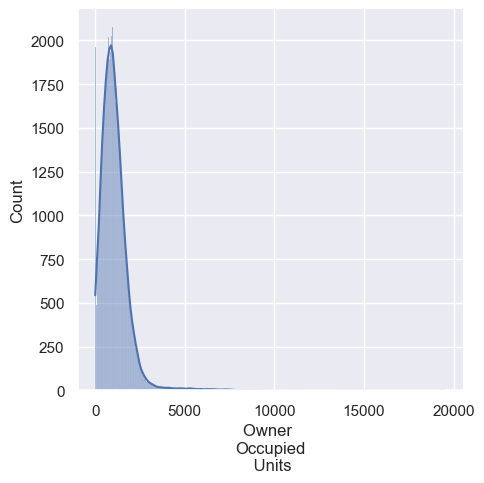

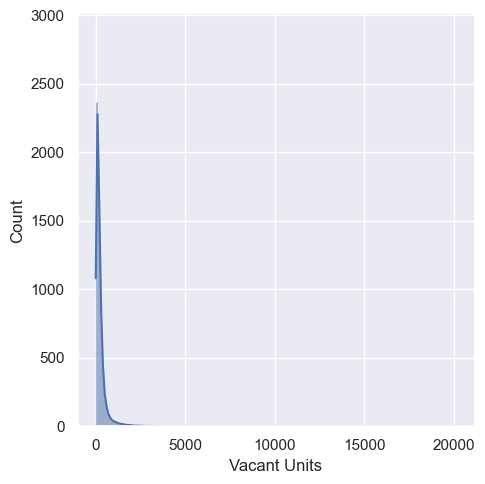

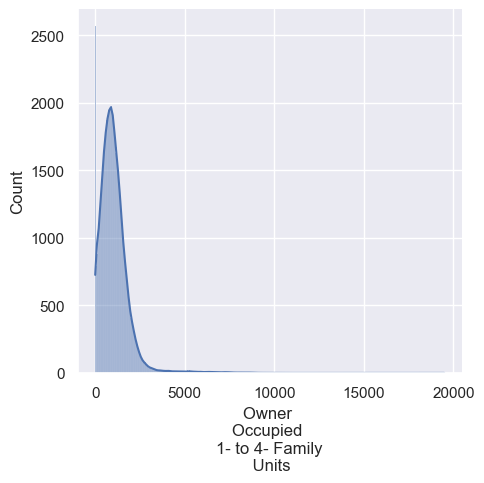

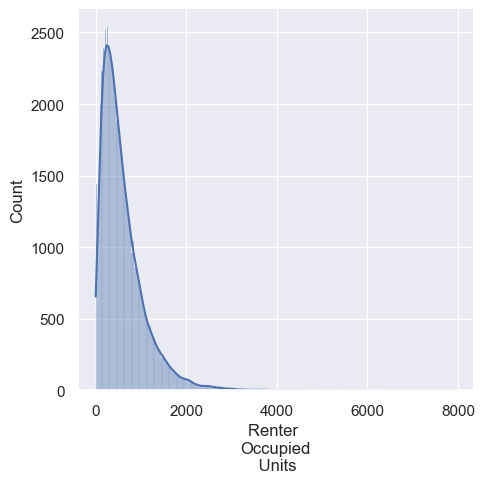

In [6]:
# plotting numerical data
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(13,7)})
df_key = df.keys()
df = df[:].replace('&nbsp;',np.nan)
df = df[:].replace('-',np.nan)
df = df.dropna(axis='rows', thresh=7)

data_list = [6,7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,31,32,33,34,35,36,37,38,39,40,41,46,47,48,50,51,52,53]
sl = 0
for i in data_list:
    data = df.iloc[:,data_list[sl]]
    sns.displot(pd.to_numeric(data),kde=True)
    name = 'Python Column {}.png'.format(data_list[sl])
    plt.savefig(name,dpi=300,bbox_inches='tight')
    #print(data)
    sl+=1


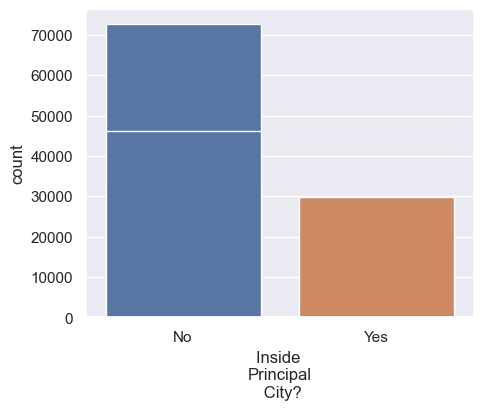

In [14]:
# plotting catagorical data
sns.set(rc={'figure.figsize':(5,4)})
data_list1 = [4, 5, 19, 49]

sl1 = 0
for j in data_list1:
    data1 = df.iloc[:,data_list1[sl1]]
    sns.countplot(x=data1, data=df)
    name = 'Bar Python Column {}.png'.format(data_list1[sl1])
    plt.savefig(name,dpi=300,bbox_inches='tight')
    #print(data)
    sl1+=1